# No Growth Deployment Calculations
We will think of the need for reactors in terms of their power capacity. When a LWR is retired, it will be replaced by an equivalent capacity of the advanced reactor models considered in the work.

In [93]:
import numpy as np
import pandas as pd
import sys
import matplotlib
from collections import defaultdict
matplotlib.use
import matplotlib.pyplot as plt
plt.style.use('../plotting.mplstyle')

In [94]:
sys.path.insert(0,'../../../scripts')

In [138]:
mycolors = ["#332288", "#117733", "#44AA99", "#88CCEE", "#DDCC77", "#CC6677", "#AA4499", "#882255"]

In [95]:
import reactor_deployment as dep
import scenario_definitions as sd

In [96]:
base_dir = '../../../../../../../../media/nsryan/Elements/scenes/analysis/dep_calcs/'

In [110]:
# pull the data from base_dir csvs
ng_data = pd.read_csv(f'{base_dir}ng_cap.csv')
m5_data = pd.read_csv(f'{base_dir}m5_cap.csv')
m15_data = pd.read_csv(f'{base_dir}m15_cap.csv')
l1_data = pd.read_csv(f'{base_dir}l1_cap.csv')
d2_data = pd.read_csv(f'{base_dir}d2_cap.csv')
d3_data = pd.read_csv(f'{base_dir}d3_cap.csv')


In [120]:
d3_data

,Year,new_LWR_Capacity,Total LWR Capacity,time_step,Total LWR Capacity Inc 1.056467308549538,New Capacity Inc 1.056467308549538
0,1958,0.000,0.000000e+00,0,0.000000e+00,0.000000e+00
1,1959,182.225,1.822250e+02,12,1.822250e+02,0.000000e+00
2,1960,154.475,3.367000e+02,24,3.367000e+02,0.000000e+00
3,1961,0.000,3.367000e+02,36,3.367000e+02,0.000000e+00
4,1962,296.000,6.327000e+02,48,6.327000e+02,0.000000e+00
...,...,...,...,...,...,...
142,2100,0.000,2.066450e+03,1704,4.513029e+06,4.510962e+06
143,2101,0.000,2.066450e+03,1716,4.767867e+06,4.765801e+06
144,2102,0.000,2.066450e+03,1728,5.037096e+06,5.035029e+06
145,2103,-1033.225,1.033225e+03,1740,5.321527e+06,5.320494e+06


In [111]:
#rename Unnamed: 0	to year
ng_data = ng_data.rename(columns={'Unnamed: 0':'Year'})
m5_data = m5_data.rename(columns={'Unnamed: 0':'Year'})
m15_data= m15_data.rename(columns={'Unnamed: 0':'Year'})
l1_data = l1_data.rename(columns={'Unnamed: 0':'Year'})
d2_data = d2_data.rename(columns={'Unnamed: 0':'Year'})
d3_data = d3_data.rename(columns={'Unnamed: 0':'Year'})

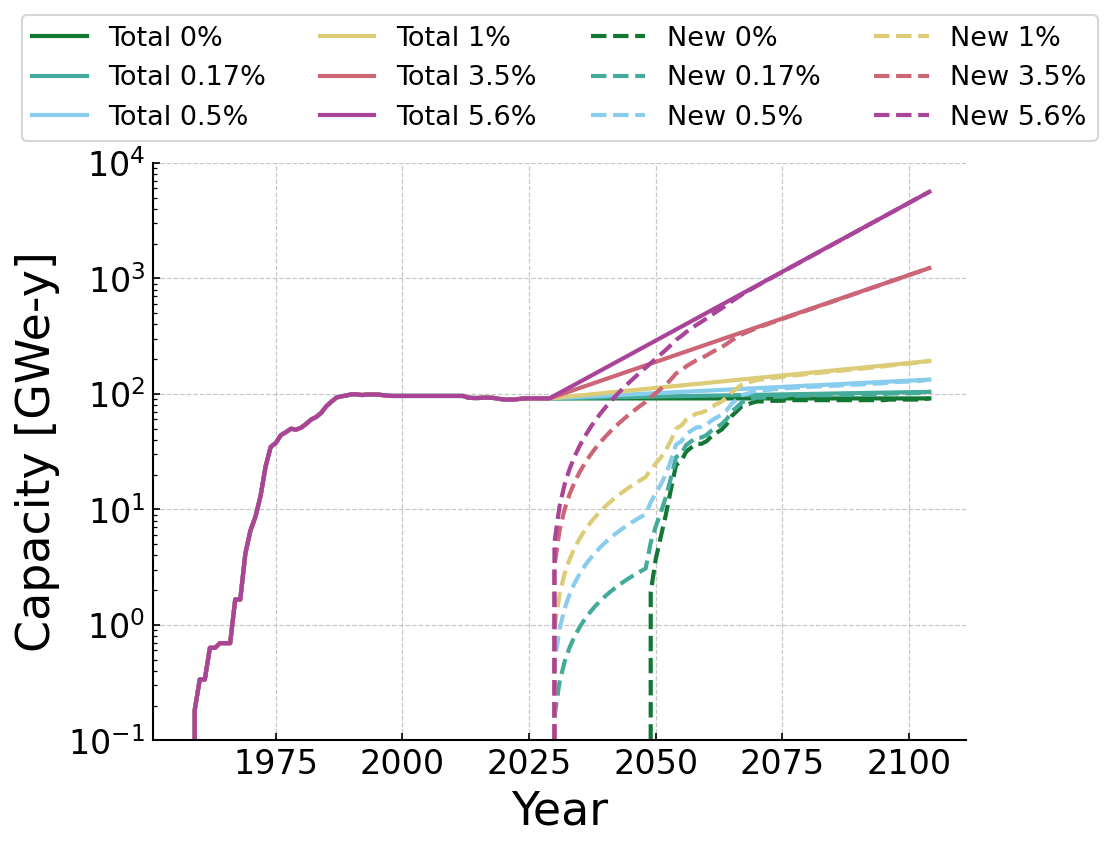

In [150]:
# plt.plot(ng_data['Year'], ng_data['Total LWR Capacity']/1000, label='Existing LWRs', linestyle='--')

plt.plot(ng_data['Year'], ng_data['Total LWR Capacity Inc 1']/1000, label='Total 0%', color=mycolors[1])
plt.plot(m5_data['Year'], m5_data['Total LWR Capacity Inc 1.0017440249087228']/1000, label='Total 0.17%', color=mycolors[2])
plt.plot(m15_data['Year'], m15_data['Total LWR Capacity Inc 1.0050039762209513']/1000, label='Total 0.5%', color=mycolors[3])
plt.plot(l1_data['Year'], l1_data['Total LWR Capacity Inc 1.01']/1000, label='Total 1%', color=mycolors[4])
plt.plot(d2_data['Year'], d2_data['Total LWR Capacity Inc 1.0352649238413776']/1000, label='Total 3.5%', color=mycolors[5])
plt.plot(d3_data['Year'], d3_data['Total LWR Capacity Inc 1.056467308549538']/1000, label='Total 5.6%', color=mycolors[6])

plt.plot(ng_data['Year'], ng_data['New Capacity Inc 1']/1000, label='New 0%', color=mycolors[1], linestyle='--')
plt.plot(m5_data['Year'], m5_data['New Capacity Inc 1.0017440249087228']/1000, label='New 0.17%', color=mycolors[2], linestyle='--')
plt.plot(m15_data['Year'], m15_data['New Capacity Inc 1.0050039762209513']/1000, label='New 0.5%', color=mycolors[3], linestyle='--')
plt.plot(l1_data['Year'], l1_data['New Capacity Inc 1.01']/1000, label='New 1%', color=mycolors[4], linestyle='--')
plt.plot(d2_data['Year'], d2_data['New Capacity Inc 1.0352649238413776']/1000, label='New 3.5%', color=mycolors[5], linestyle='--')
plt.plot(d3_data['Year'], d3_data['New Capacity Inc 1.056467308549538']/1000, label='New 5.6%', color=mycolors[6], linestyle='--')


plt.yscale('log')

plt.ylim(0.1, 10000)

plt.ylabel('Capacity [GWe-y]')
plt.xlabel('Year')

plt.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.28))

plt.savefig(base_dir + 'total_new_capacity_scenarios.pdf')

## First, pull in the LWR data

In [4]:
# read in the LWR deployment data so we can establish a baseline.
lwr_df = pd.read_csv('lwr_info.csv')

# Remove the 'Unnamed: 0' column
lwr_df = lwr_df.drop('Unnamed: 0', axis=1)

In [5]:
# create the simulation retirement year (either the actual retirement or 80
# years after the startup year)
lwr_df['retirement_year'] = lwr_df['Actual retirement (year)'].fillna(
    lwr_df['Startup date (year) b'] + 80)

In [6]:
lwr_df

,Reactor name,State,Reactor type,Reactor vendora,Core size (number of assemblies),Startup date (year) b,License expiration (year),Actual retirement (year),power_cap(MWe),retirement_year
0,Arkansas_Nuclear_One_1,AR,PWR,B&W,177,1974,2034,NaN,836.0,2054.0
1,Arkansas_Nuclear_One_2,AR,PWR,CE,177,1978,2038,NaN,988.0,2058.0
2,Beaver_Valley_1,PA,PWR,WE,157,1976,2036,NaN,908.0,2056.0
3,Beaver_Valley_2,PA,PWR,WE,157,1987,2047,NaN,905.0,2067.0
4,Big_Rock_Point,MI,BWR,GE,84,1964,NaN,1997.0,67.0,1997.0
...,...,...,...,...,...,...,...,...,...,...
118,Watts_Bar_2,TN,PWR,WE,193,2016,2055,NaN,1164.0,2096.0
119,Wolf_Creek_1,KS,PWR,WE,193,1985,2045,NaN,1200.0,2065.0
120,Yankee_Rowe,MA,PWR,WE,76,1960,NaN,1991.0,167.0,1991.0
121,Zion_1,IL,PWR,WE,193,1973,NaN,1997.0,1040.0,1997.0


In [7]:
capacity_change = {year: 0 for year in range(sd.sim_start_yr, sd.sim_end_yr)}

# calculate the decommissioned capacity for each retirement year
for year, power in zip(lwr_df['retirement_year'], lwr_df['power_cap(MWe)']):
    capacity_change[int(year)] -= power * sd.lwr_capacity_factor

# calculate the commissioned LWR capacity for each startup year
for year, power in zip(lwr_df['Startup date (year) b'], lwr_df['power_cap(MWe)']):
    capacity_change[int(year)] += power * sd.lwr_capacity_factor

/tmp/ipykernel_13964/3600157219.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])


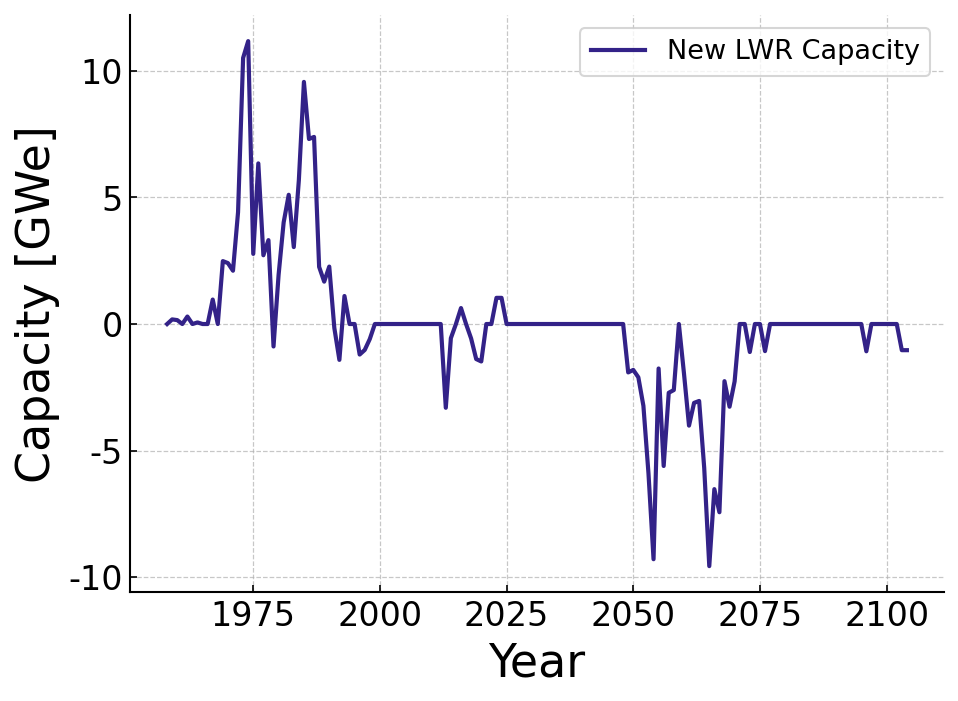

In [8]:
# Convert to a pandas DataFrame and plot.
capacity_change_df = pd.DataFrame(capacity_change.values(), index=capacity_change.keys(), columns=['new_LWR_Capacity'])
capacity_change_df.plot()

# Convert from MWe to GWe
plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])

plt.xlabel('Year')
plt.ylabel('Capacity [GWe]')

legend = plt.legend()
legend.get_texts()[0].set_text('New LWR Capacity')

In [9]:
# create a total lwr capacity column
capacity_change_df['Total LWR Capacity'] = capacity_change_df['new_LWR_Capacity'].cumsum()

/tmp/ipykernel_13964/722816693.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])


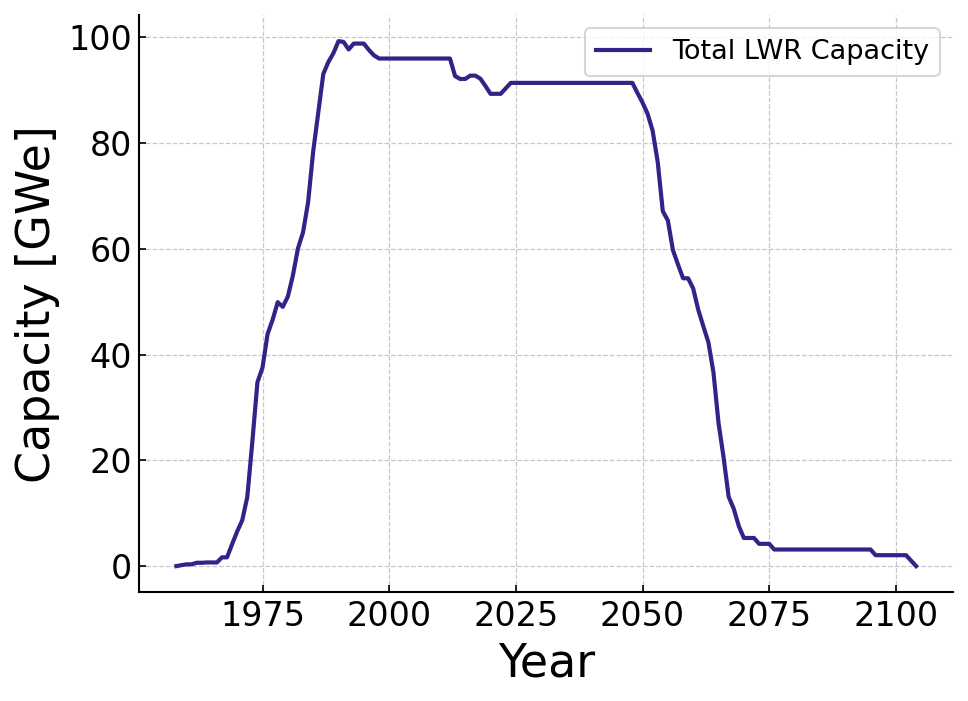

In [10]:
capacity_change_df[["Total LWR Capacity"]].plot()

# Convert from MWe to GWe
plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])

plt.xlabel('Year')
plt.ylabel('Capacity [GWe]')

legend = plt.legend()
legend.get_texts()[0].set_text('Total LWR Capacity')

## Capacity Expansion Calculations
In this section, I will perform the calculations required to do the energy demand increase. We will use the capacity from the transition_year variable in `scenario_definitions.py`

In [11]:
c

Total LWR capacity in 2029: 91345.6 MWe


In [43]:
def capacity_increase(df, base_col, rate, start_year=sd.transition_year, end_year=sd.sim_end_yr):
    """
    This function takes in an increase rate, and creates a new column in the
    dataframe populated with the increased capacity.

    Parameters
    ----------
    df : pandas DataFrame
        The dataframe to add the new column to.
    base_col : str
        The name of the column to use as the base capacity.
        This column should contain the net capacity.
    rate : float
        The percentage of change in capacity year-to-year
        (e.g. 1.01 for a 1% increase).
    start_year : int
        The year to start the increase.
    end_year : int
        The year to end the increase.

    Returns
    -------
    df : pandas DataFrame
        The dataframe with the new column added.
    """
    for year in range(start_year, end_year):
        df.loc[year, f"{base_col} Inc {rate}"] = \
            df.loc[start_year, base_col] * (rate)**(year - start_year)

    for year in range(df.index[0], start_year):
        df.loc[year, f"{base_col} Inc {rate}"] = df.loc[year, base_col]

    df[f"New Capacity Inc {rate}"] = df[f"{base_col} Inc {rate}"] - df[base_col]
    return df

## No Growth Scenarios
Growth Rate: 1

In this section, we will use the functions in `reactor_deployment.py` to deploy the advanced reactors to meet demand.

In [62]:
rate = 1.05**(1/(2050-2022))

In [90]:
rate = 2**(1/(2050-2030))
print(rate)

1.0352649238413776


In [101]:
no_growth_cap_df = capacity_change_df.copy()
capacity_increase(no_growth_cap_df, 'Total LWR Capacity', 1)

,new_LWR_Capacity,Total LWR Capacity,time_step,Total LWR Capacity Inc 1,New Capacity Inc 1
1958,0.000,0.000000e+00,0,0.000,0.000
1959,182.225,1.822250e+02,12,182.225,0.000
1960,154.475,3.367000e+02,24,336.700,0.000
1961,0.000,3.367000e+02,36,336.700,0.000
1962,296.000,6.327000e+02,48,632.700,0.000
...,...,...,...,...,...
2100,0.000,2.066450e+03,1704,91345.600,89279.150
2101,0.000,2.066450e+03,1716,91345.600,89279.150
2102,0.000,2.066450e+03,1728,91345.600,89279.150
2103,-1033.225,1.033225e+03,1740,91345.600,90312.375


In [102]:
no_growth_cap_df.to_csv(base_dir + 'ng_cap.csv')

/tmp/ipykernel_23409/572849912.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])


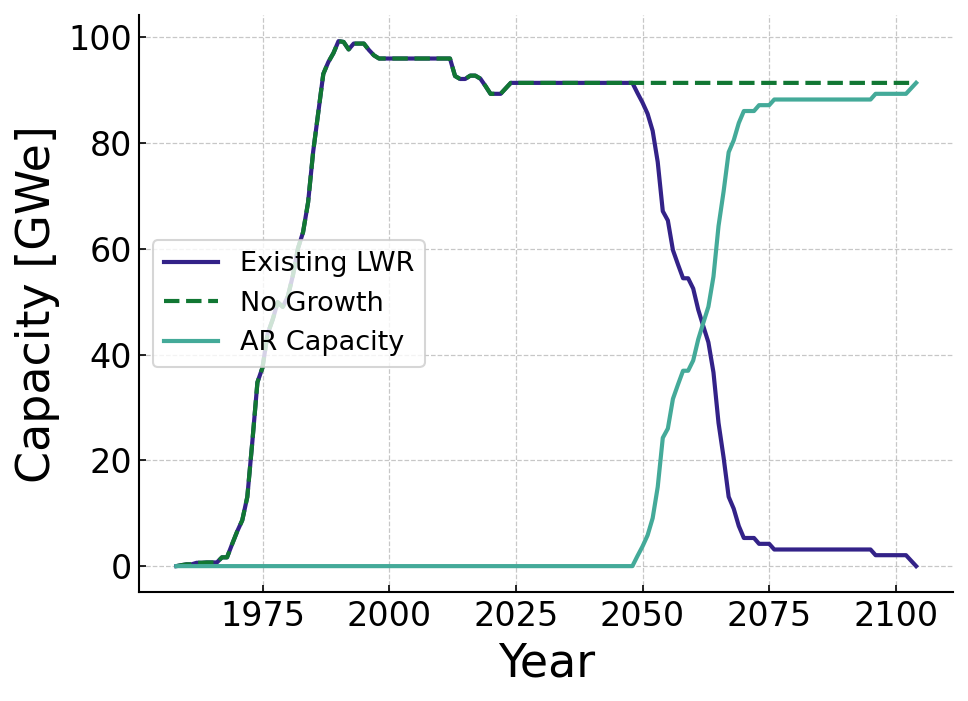

In [106]:
no_growth_cap_df[['Total LWR Capacity',f'Total LWR Capacity Inc 1',f'New Capacity Inc 1']].plot(style=['-','--','-'])

plt.xlabel('Year')
plt.ylabel('Capacity [GWe]')
# plt.yscale('log')
# plt.ylim(10, 10000000)

# Convert from MWe to GWe
plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])

legend = plt.legend(loc='center left')
legend.get_texts()[0].set_text('Existing LWR')
legend.get_texts()[1].set_text('No Growth')
legend.get_texts()[2].set_text('AR Capacity')

plt.savefig('../../../../../../../../media/nsryan/Elements/scenes/analysis/dep_calcs/ng_capacity.pdf')

### Greedy Deployment

In [38]:
# Copy the base capacity dataframe so we can modify it.
greedy_no_growth_cap_df = no_growth_cap_df.copy()

greedy_no_growth_cap_df

,new_LWR_Capacity,Total LWR Capacity,time_step,Total LWR Capacity Inc 1,New Capacity Inc 1,AP1000,Xe100,MMR,AP1000_new,Xe100_new,MMR_new,AP1000_new_cap,Xe100_new_cap,MMR_new_cap,AP1000_new_cap_total,Xe100_new_cap_total,MMR_new_cap_total
1958,0.000,0.000000e+00,0,0.000,0.000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959,182.225,1.822250e+02,12,182.225,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1960,154.475,3.367000e+02,24,336.700,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1961,0.000,3.367000e+02,36,336.700,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1962,296.000,6.327000e+02,48,632.700,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,0.000,2.066450e+03,1704,91345.600,89279.150,80.0,1116.0,17856.0,0.0,0.0,0.0,0.0,0.0,0.0,89360.0,89280.0,89280.0
2101,0.000,2.066450e+03,1716,91345.600,89279.150,80.0,1116.0,17856.0,0.0,0.0,0.0,0.0,0.0,0.0,89360.0,89280.0,89280.0
2102,0.000,2.066450e+03,1728,91345.600,89279.150,80.0,1116.0,17856.0,0.0,0.0,0.0,0.0,0.0,0.0,89360.0,89280.0,89280.0
2103,-1033.225,1.033225e+03,1740,91345.600,90312.375,81.0,1129.0,18063.0,1.0,13.0,207.0,1117.0,1040.0,1035.0,90477.0,90320.0,90315.0


In [39]:
# Make a column for the year.
greedy_no_growth_cap_df = greedy_no_growth_cap_df.reset_index().rename(columns={'index':'Year'})

In [40]:
# Use the greedy deployment function to deploy reactors.
dep.greedy_deployment(greedy_no_growth_cap_df, "New Capacity Inc 1", sd.ad_reactors, sd.transition_year)

,Year,new_LWR_Capacity,Total LWR Capacity,time_step,Total LWR Capacity Inc 1,New Capacity Inc 1,AP1000,Xe100,MMR,AP1000_new,...,Xe100Decom,MMRDecom,total_cap,new_cap,new_AP1000_cap,AP1000_cap,new_Xe100_cap,Xe100_cap,new_MMR_cap,MMR_cap
0,1958,0.000,0.000000e+00,0,0.000,0.000,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1959,182.225,1.822250e+02,12,182.225,0.000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1960,154.475,3.367000e+02,24,336.700,0.000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1961,0.000,3.367000e+02,36,336.700,0.000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1962,296.000,6.327000e+02,48,632.700,0.000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,2100,0.000,2.066450e+03,1704,91345.600,89279.150,80.0,1116.0,17856.0,0.0,...,0,5,80,55,0,0,0,0,55,80
143,2101,0.000,2.066450e+03,1716,91345.600,89279.150,80.0,1116.0,17856.0,0.0,...,0,9,45,0,0,0,0,0,0,45
144,2102,0.000,2.066450e+03,1728,91345.600,89279.150,80.0,1116.0,17856.0,0.0,...,0,4,45,25,0,0,0,0,25,45
145,2103,-1033.225,1.033225e+03,1740,91345.600,90312.375,81.0,1129.0,18063.0,1.0,...,0,1,1055,1050,0,0,1040,1040,10,15


In [18]:
# Write the results to a csv
greedy_no_growth_cap_df.to_csv('no_growth/greedy_no_growth_cap.csv', index=False)

/home/nsryan/anaconda3/envs/cyclus/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


Text(0, 0.5, 'Capacity [GWe]')

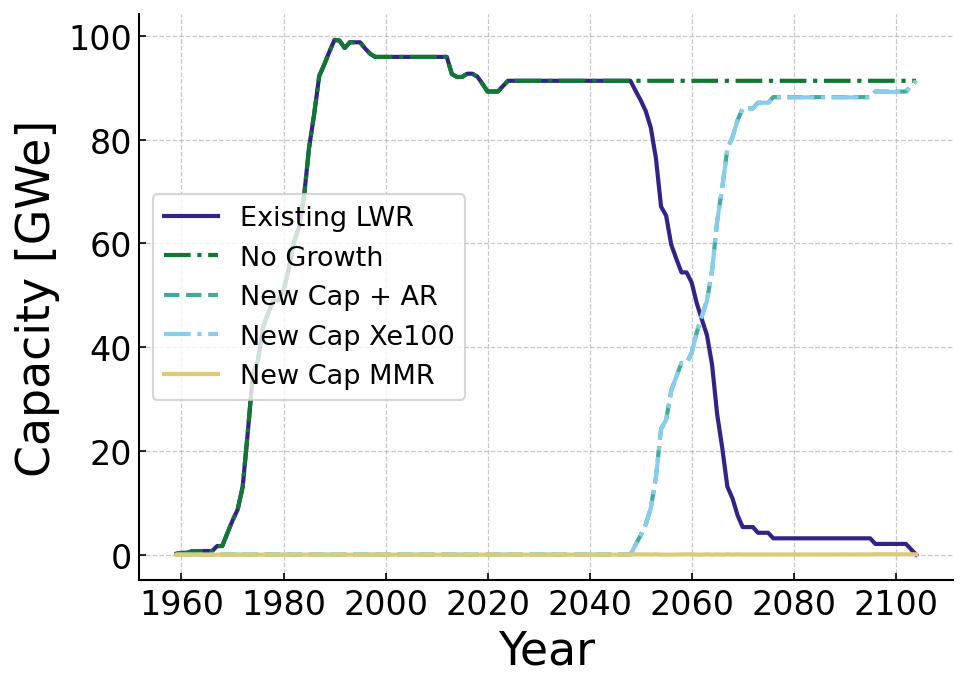

In [19]:
e = ['Year','new_Xe100_cap','new_MMR_cap']
es = ['-','-']

f = ['Year','new_MMR_cap']
fs = ['-']

g = ['Year','Total LWR Capacity','Total LWR Capacity Inc 1','new_cap','new_Xe100_cap','new_MMR_cap']
gs = ['-','-.','--','-.','-']

h = ['Year','num_Xe100', 'num_MMR']
hs = ['-','-']

greedy_no_growth_cap_df[g].plot(x='Year', logy=False, style=gs)


plt.xlabel('Year')

legend = plt.legend()
# g
legend.get_texts()[0].set_text('Existing LWR')
legend.get_texts()[1].set_text('No Growth')
legend.get_texts()[2].set_text('New Cap + AR')
legend.get_texts()[3].set_text('New Cap Xe100')
legend.get_texts()[4].set_text('New Cap MMR')
# Convert from MWe to GWe
plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])
plt.ylabel('Capacity [GWe]')

# e
# legend.get_texts()[1].set_text('New Cap MMR')
# # Convert from MWe to GWe
# plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])
# plt.ylabel('Capacity [GWe]')

# f
# legend.get_texts()[3].set_text('New Cap Xe100')
# legend.get_texts()[4].set_text('New Cap MMR')
# # Convert from MWe to GWe
# plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])
# plt.ylabel('Capacity [GWe]')

# h
# legend.get_texts()[0].set_text('Xe-100')
# legend.get_texts()[1].set_text('MMR')
# plt.ylabel('Number of Reactors [#]')

In [20]:
dep.analyze_algorithm(greedy_no_growth_cap_df, "Total LWR Capacity Inc 1", "new_cap", sd.ad_reactors)

{'above_count': 0,
 'below_count': 146,
 'equal_count': 0,
 'above_percentage': 0.0,
 'below_percentage': 100.0,
 'total_above': 0.0,
 'total_below': -7772443.999999999,
 'percent_provided': {'Xe100': 99.89685129012294, 'MMR': 0.10314870987706559}}

### Pre Determined Distribution
This section I will skip at the moment as I have not put enough thought into scenarios that would be of interested based on what companies are saying. At present, I think staggering the initial deployment of each technology is the most i can say about the distribution of any specific reactor technology based on the deadlines they are trying to meet.

### Rough Random Deployment
I will only use the rough case as I am not confident the true random case will converge. 

Tolerance will be 5, and the seed will be set for now with the `True` argument.

In [21]:
# Make a copy of the no growth capacity dataframe so we can modify it.
rrd_no_growth_cap_df = no_growth_cap_df.copy()

rrd_no_growth_cap_df

,new_LWR_Capacity,Total LWR Capacity,Total LWR Capacity Inc 1,New Capacity Inc 1
1959,182.225,1.822250e+02,182.225,0.000
1960,154.475,3.367000e+02,336.700,0.000
1961,0.000,3.367000e+02,336.700,0.000
1962,296.000,6.327000e+02,632.700,0.000
1963,0.000,6.327000e+02,632.700,0.000
...,...,...,...,...
2100,0.000,2.066450e+03,91345.600,89279.150
2101,0.000,2.066450e+03,91345.600,89279.150
2102,0.000,2.066450e+03,91345.600,89279.150
2103,-1033.225,1.033225e+03,91345.600,90312.375


In [22]:
# Make a column for the year.
rrd_no_growth_cap_df = rrd_no_growth_cap_df.reset_index().rename(columns={'index':'Year'})

In [23]:
# Use the random reactor deployment function to deploy reactors.
dep.rand_deployment(rrd_no_growth_cap_df, "New Capacity Inc 1", sd.ad_reactors, sd.transition_year, set_seed=True, rough=True, tolerance=5)

,Year,new_LWR_Capacity,Total LWR Capacity,Total LWR Capacity Inc 1,New Capacity Inc 1,num_Xe100,num_MMR,Xe100Decom,MMRDecom,total_cap,new_cap,new_Xe100_cap,Xe100_cap,new_MMR_cap,MMR_cap
0,1959,182.225,1.822250e+02,182.225,0.000,0,0,0,0,0,0,0,0,0,0
1,1960,154.475,3.367000e+02,336.700,0.000,0,0,0,0,0,0,0,0,0,0
2,1961,0.000,3.367000e+02,336.700,0.000,0,0,0,0,0,0,0,0,0,0
3,1962,296.000,6.327000e+02,632.700,0.000,0,0,0,0,0,0,0,0,0,0
4,1963,0.000,6.327000e+02,632.700,0.000,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2100,0.000,2.066450e+03,91345.600,89279.150,1047,2667,0,1570,97095,89245,83760,83760,5485,13335
142,2101,0.000,2.066450e+03,91345.600,89279.150,1047,2715,0,1618,97335,89245,83760,83760,5485,13575
143,2102,0.000,2.066450e+03,91345.600,89279.150,1047,2746,0,1649,97490,89245,83760,83760,5485,13730
144,2103,-1033.225,1.033225e+03,91345.600,90312.375,1058,2814,0,1690,98710,90260,84640,84640,5620,14070


In [24]:
# Make a csv of the results.
rrd_no_growth_cap_df.to_csv('no_growth/rrd_no_growth_cap.csv', index=False)

Text(0, 0.5, 'Capacity [GWe]')

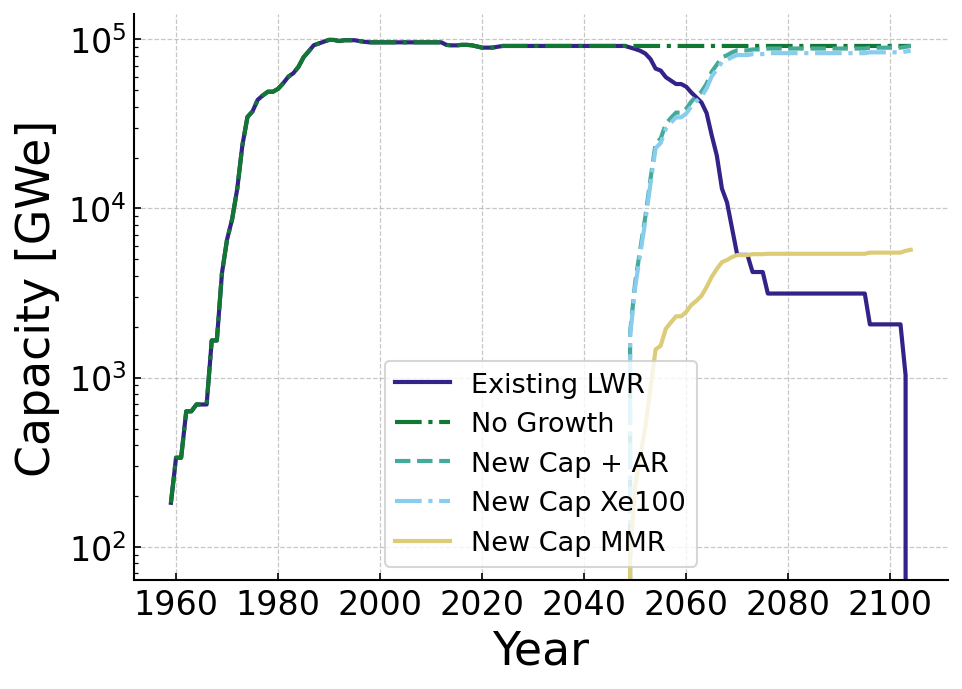

In [25]:
g = ['Year','Total LWR Capacity','Total LWR Capacity Inc 1','new_cap','new_Xe100_cap','new_MMR_cap']
gs = ['-','-.','--','-.','-']

e = ['Year','new_Xe100_cap','new_MMR_cap']
es = ['-','-']

f = ['Year','new_MMR_cap']
fs = ['-']

h = ['Year','num_Xe100', 'num_MMR']
hs = ['-','-']

rrd_no_growth_cap_df[g].plot(x='Year', logy=True, style=gs)

plt.xlabel('Year')

legend = plt.legend()
# g
legend.get_texts()[0].set_text('Existing LWR')
legend.get_texts()[1].set_text('No Growth')
legend.get_texts()[2].set_text('New Cap + AR')
legend.get_texts()[3].set_text('New Cap Xe100')
legend.get_texts()[4].set_text('New Cap MMR')
# Convert from MWe to GWe
# plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])
plt.ylabel('Capacity [GWe]')

# e
# legend.get_texts()[1].set_text('New Cap MMR')
# # Convert from MWe to GWe
# plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])
# plt.ylabel('Capacity [GWe]')

# f
# legend.get_texts()[3].set_text('New Cap Xe100')
# legend.get_texts()[4].set_text('New Cap MMR')
# # Convert from MWe to GWe
# plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])
# plt.ylabel('Capacity [GWe]')

# h
# legend.get_texts()[0].set_text('Xe-100')
# legend.get_texts()[1].set_text('MMR')
# plt.ylabel('Number of Reactors [#]')

In [26]:
dep.analyze_algorithm(rrd_no_growth_cap_df, "Total LWR Capacity Inc 1", "new_cap", sd.ad_reactors)

{'above_count': 0,
 'below_count': 146,
 'equal_count': 0,
 'above_percentage': 0.0,
 'below_percentage': 100.0,
 'total_above': 0.0,
 'total_below': -7773588.999999999,
 'percent_provided': {'Xe100': 90.166559740635, 'MMR': 9.833440259365013}}

## Rough Random + Greedy

In [27]:
# Make a copy of the no growth capacity dataframe so we can modify it.
rr_pgd_no_growth_cap_df = no_growth_cap_df.copy()

In [28]:
# Make a column for the year.
rr_pgd_no_growth_cap_df = rr_pgd_no_growth_cap_df.reset_index().rename(columns={'index':'Year'})

In [29]:
# Use the random reactor deployment function to deploy reactors.
dep.rand_greedy_deployment(rr_pgd_no_growth_cap_df, "New Capacity Inc 1", sd.ad_reactors, sd.transition_year, set_seed=True)

,Year,new_LWR_Capacity,Total LWR Capacity,Total LWR Capacity Inc 1,New Capacity Inc 1,num_Xe100,num_MMR,Xe100Decom,MMRDecom,total_cap,new_cap,new_Xe100_cap,Xe100_cap,new_MMR_cap,MMR_cap,remaining_cap,greedy_num_Xe100,rand_num_Xe100,greedy_num_MMR,rand_num_MMR
0,1959,182.225,1.822250e+02,182.225,0.000,0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0
1,1960,154.475,3.367000e+02,336.700,0.000,0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0
2,1961,0.000,3.367000e+02,336.700,0.000,0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0
3,1962,296.000,6.327000e+02,632.700,0.000,0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0
4,1963,0.000,6.327000e+02,632.700,0.000,0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2100,0.000,2.066450e+03,91345.600,89279.150,1047,4737,0,2064,204540,107445,83760,83760,13365,23685,34.150,0,1047,2070,2667
142,2101,0.000,2.066450e+03,91345.600,89279.150,1047,4884,0,2163,205515,108180,83760,83760,13605,24420,34.150,0,1047,2169,2715
143,2102,0.000,2.066450e+03,91345.600,89279.150,1047,4977,0,2225,206135,108645,83760,83760,13760,24885,34.150,0,1047,2231,2746
144,2103,-1033.225,1.033225e+03,91345.600,90312.375,1058,5137,0,2313,209035,110325,84640,84640,14120,25685,52.375,0,1058,2323,2814


In [30]:
# Make a csv of the results.
rr_pgd_no_growth_cap_df.to_csv('no_growth/rr_pgd_no_growth_cap.csv', index=False)

Text(0, 0.5, 'Capacity [GWe]')

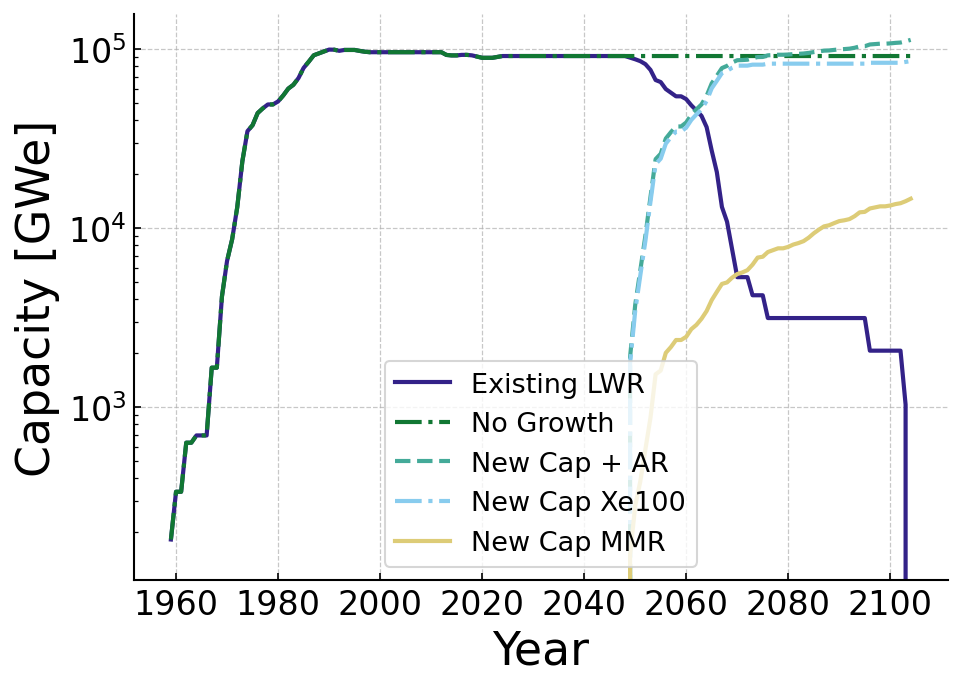

In [31]:
g = ['Year','Total LWR Capacity','Total LWR Capacity Inc 1','new_cap','new_Xe100_cap','new_MMR_cap']
gs = ['-','-.','--','-.','-']

e = ['Year','new_Xe100_cap','new_MMR_cap']
es = ['-','-']

f = ['Year','new_MMR_cap']
fs = ['-']

h = ['Year','num_Xe100', 'num_MMR']
hs = ['-','-']

rr_pgd_no_growth_cap_df[g].plot(x='Year', logy=True, style=gs)

plt.xlabel('Year')

legend = plt.legend()
# g
legend.get_texts()[0].set_text('Existing LWR')
legend.get_texts()[1].set_text('No Growth')
legend.get_texts()[2].set_text('New Cap + AR')
legend.get_texts()[3].set_text('New Cap Xe100')
legend.get_texts()[4].set_text('New Cap MMR')
# Convert from MWe to GWe
# plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])
plt.ylabel('Capacity [GWe]')

# e
# legend.get_texts()[1].set_text('New Cap MMR')
# # Convert from MWe to GWe
# plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])
# plt.ylabel('Capacity [GWe]')

# f
# legend.get_texts()[3].set_text('New Cap Xe100')
# legend.get_texts()[4].set_text('New Cap MMR')
# # Convert from MWe to GWe
# plt.gca().set_yticklabels([str(int(tick/1000)) for tick in plt.gca().get_yticks()])
# plt.ylabel('Capacity [GWe]')

# h
# legend.get_texts()[0].set_text('Xe-100')
# legend.get_texts()[1].set_text('MMR')
# plt.ylabel('Number of Reactors [#]')

In [32]:
dep.analyze_algorithm(rr_pgd_no_growth_cap_df, "Total LWR Capacity Inc 1", "new_cap", sd.ad_reactors)

{'above_count': 29,
 'below_count': 117,
 'equal_count': 0,
 'above_percentage': 19.863013698630137,
 'below_percentage': 80.13698630136986,
 'total_above': 261552.59999999983,
 'total_below': -7683536.599999997,
 'percent_provided': {'Xe100': 44.05170294434498, 'MMR': 7.092376333981543}}

# section

In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib
matplotlib.use
import matplotlib.pyplot as plt
plt.style.use('../plotting.mplstyle')

sys.path.insert(0,'../../../scripts')

import reactor_deployment as dep
import scenario_definitions as sd

# read in the LWR deployment data so we can establish a baseline.
lwr_df = pd.read_csv('lwr_info.csv')

# Remove the 'Unnamed: 0' column
lwr_df = lwr_df.drop('Unnamed: 0', axis=1)

lwr_df['retirement_year'] = lwr_df['Actual retirement (year)'].fillna(
    lwr_df['Startup date (year) b'] + 80)

capacity_change = {year: 0 for year in range(sd.sim_start_yr, sd.sim_end_yr)}

# calculate the decommissioned capacity for each retirement year
for year, power in zip(lwr_df['retirement_year'], lwr_df['power_cap(MWe)']):
    capacity_change[int(year)] -= power * sd.lwr_capacity_factor

# calculate the commissioned LWR capacity for each startup year
for year, power in zip(lwr_df['Startup date (year) b'], lwr_df['power_cap(MWe)']):
    capacity_change[int(year)] += power * sd.lwr_capacity_factor

# Convert to a pandas DataFrame and plot.
capacity_change_df = pd.DataFrame(capacity_change.values(), index=capacity_change.keys(), columns=['new_LWR_Capacity'])

# create a total lwr capacity column
capacity_change_df['Total LWR Capacity'] = capacity_change_df['new_LWR_Capacity'].cumsum()

# create a time step column that subtracts the start year from the current year and multiplies by 12
capacity_change_df['time_step'] = (capacity_change_df.index - sd.sim_start_yr) * 12

# create a function that will generate the deployinst.xml file for each reactor column by reading in the number of reactors at each time step and converting it into a deployinst.xml file
def generate_deployinst_xml(df, reactor_name, transition_year=sd.transition_year, end_year=sd.sim_end_yr):
  start_row = int(transition_year) + 1
  deployinst_xml = """<DeployInst>
               <prototypes>"""

  for year in range(transition_year, end_year):
    if df.loc[year, f'{reactor}_new'] != 0:
      deployinst_xml += f"""
                  <val>{reactor_name}</val>"""

  deployinst_xml += """
               </prototypes>
               <build_times>"""

  for year in range(transition_year, end_year):
    if df.loc[year, f'{reactor}_new'] != 0:
      deployinst_xml += f"""
                <val>{df.loc[year,'time_step']}</val>"""

  deployinst_xml += """
               </build_times>
               <n_build>"""

  for year in range(transition_year, end_year):
    if df.loc[year, f'{reactor}_new'] != 0:
      deployinst_xml += f"""
                <val>{int(df.loc[year, f'{reactor}_new'])}</val>"""

  deployinst_xml += """
               </n_build>
             </DeployInst>"""

  return deployinst_xml.strip()

Total LWR capacity in 2029: 91345.60000000002 MWe


<Axes: xlabel='time_step'>

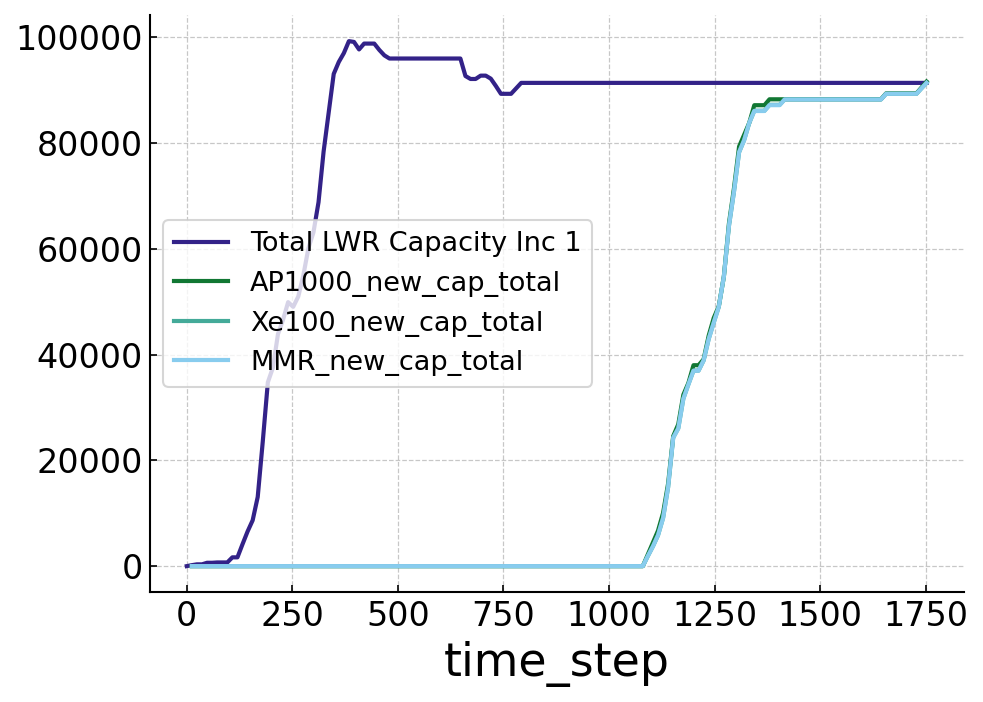

In [17]:
# # No Growth

base_capacity = capacity_change_df.loc[sd.transition_year, 'Total LWR Capacity'] # in MWe

print(f"Total LWR capacity in {sd.transition_year}: {base_capacity} MWe")

no_growth_cap_df = capacity_change_df.copy()
dep.capacity_increase(df=no_growth_cap_df, base_col='Total LWR Capacity', rate=1, start_year=sd.transition_year, end_year=sd.sim_end_yr)

for reactor in sd.ad_reactors.keys():
    no_growth_cap_df[f'{reactor}'] = np.ceil(no_growth_cap_df['New Capacity Inc 1']/sd.ad_reactors[reactor][0])

for reactor in sd.ad_reactors.keys():
    no_growth_cap_df[f'{reactor}_new'] = no_growth_cap_df[f'{reactor}'].diff()

no_growth_cap_df['AP1000_new_cap'] = no_growth_cap_df['AP1000_new'] * sd.ad_reactors['AP1000'][0]
no_growth_cap_df['Xe100_new_cap'] = no_growth_cap_df['Xe100_new'] * sd.ad_reactors['Xe100'][0]
no_growth_cap_df['MMR_new_cap'] = no_growth_cap_df['MMR_new'] * sd.ad_reactors['MMR'][0]

no_growth_cap_df['AP1000_new_cap_total'] = no_growth_cap_df['AP1000_new_cap'].cumsum()
no_growth_cap_df['Xe100_new_cap_total'] = no_growth_cap_df['Xe100_new_cap'].cumsum()
no_growth_cap_df['MMR_new_cap_total'] = no_growth_cap_df['MMR_new_cap'].cumsum()

no_growth_cap_df[['time_step','Total LWR Capacity Inc 1','AP1000_new_cap_total', 'Xe100_new_cap_total', 'MMR_new_cap_total']].plot(x='time_step')

In [ ]:
output_dir = '../single_reactor/one_fuel/deployment_calcs/'
for reactor in sd.ad_reactors.keys():
    xml_string = generate_deployinst_xml(no_growth_cap_df, reactor)
    with open(f'{output_dir}ng_{reactor}_deployinst.xml', 'w') as f:
        f.write(xml_string)

In [22]:
# ## Greedy

greedy_no_growth_cap_df = capacity_change_df.copy()
dep.capacity_increase(df=greedy_no_growth_cap_df, base_col='Total LWR Capacity', rate=1, start_year=sd.transition_year, end_year=sd.sim_end_yr)

# Make a column for the year.
greedy_no_growth_cap_df = greedy_no_growth_cap_df.reset_index().rename(columns={'index':'Year'})

dep.greedy_deployment(df=greedy_no_growth_cap_df, base_col='New Capacity Inc 1', ar_dict=sd.ad_reactors, dep_start_year=sd.transition_year)

for reactor in sd.ad_reactors.keys():
    greedy_no_growth_cap_df[f'{reactor}_new'] = greedy_no_growth_cap_df[f'num_{reactor}']

greedy_no_growth_cap_df.set_index('Year', inplace=True)

greedy_no_growth_cap_df['AP1000_new_cap'] = greedy_no_growth_cap_df['AP1000_new'] * sd.ad_reactors['AP1000'][0]
greedy_no_growth_cap_df['Xe100_new_cap'] = greedy_no_growth_cap_df['Xe100_new'] * sd.ad_reactors['Xe100'][0]
greedy_no_growth_cap_df['MMR_new_cap'] = greedy_no_growth_cap_df['MMR_new'] * sd.ad_reactors['MMR'][0]

greedy_no_growth_cap_df['AP1000_new_cap_total'] = greedy_no_growth_cap_df['AP1000_new_cap'].cumsum()
greedy_no_growth_cap_df['Xe100_new_cap_total'] = greedy_no_growth_cap_df['Xe100_new_cap'].cumsum()
greedy_no_growth_cap_df['MMR_new_cap_total'] = greedy_no_growth_cap_df['MMR_new_cap'].cumsum()

greedy_no_growth_cap_df['fake_total'] = greedy_no_growth_cap_df['MMR_new_cap_total'] + greedy_no_growth_cap_df['Xe100_new_cap_total'] + greedy_no_growth_cap_df['AP1000_new_cap_total']

greedy_no_growth_cap_df['tt'] = greedy_no_growth_cap_df['Total LWR Capacity'] + greedy_no_growth_cap_df['fake_total']


<Axes: xlabel='Year'>

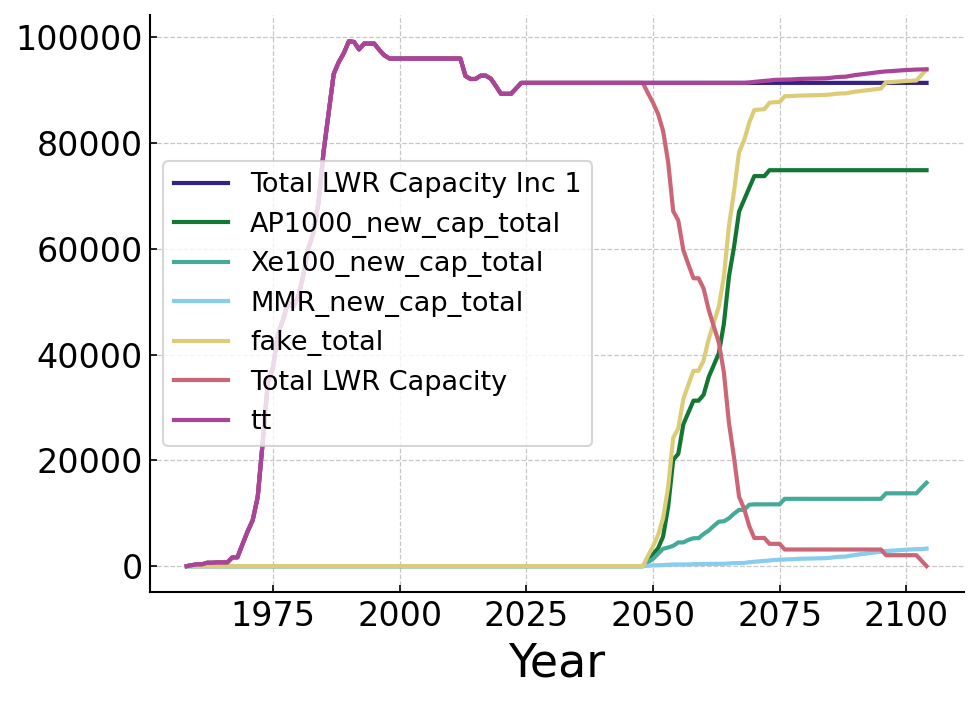

In [23]:
greedy_no_growth_cap_df[['Total LWR Capacity Inc 1','AP1000_new_cap_total', 'Xe100_new_cap_total', 'MMR_new_cap_total', 'fake_total','Total LWR Capacity', 'tt']].plot()

In [27]:
output_dir = '../../../../../../../../media/nsryan/Elements/scenes/greedy/'
for reactor in sd.ad_reactors.keys():
    xml_string = generate_deployinst_xml(greedy_no_growth_cap_df, reactor)
    with open(f'{output_dir}ng_greedy_{reactor}_deployinst.xml', 'w') as f:
        f.write(xml_string)

In [29]:
# ## Rand + Greedy

greedy_no_growth_cap_df = capacity_change_df.copy()
dep.capacity_increase(df=greedy_no_growth_cap_df, base_col='Total LWR Capacity', rate=1, start_year=sd.transition_year, end_year=sd.sim_end_yr)

# Make a column for the year.
greedy_no_growth_cap_df = greedy_no_growth_cap_df.reset_index().rename(columns={'index':'Year'})

dep.rand_greedy_deployment(df=greedy_no_growth_cap_df, base_col='New Capacity Inc 1', ar_dict=sd.ad_reactors, dep_start_year=sd.transition_year, set_seed=True)

for reactor in sd.ad_reactors.keys():
    greedy_no_growth_cap_df[f'{reactor}_new'] = greedy_no_growth_cap_df[f'num_{reactor}']

greedy_no_growth_cap_df.set_index('Year', inplace=True)

output_dir = '../../../../../../../../media/nsryan/Elements/scenes/rand_greed_one/'
for reactor in sd.ad_reactors.keys():
    xml_string = generate_deployinst_xml(greedy_no_growth_cap_df, reactor)
    with open(f'{output_dir}ng_rand_greedy_{reactor}_deployinst.xml', 'w') as f:
        f.write(xml_string)

In [32]:
# ## Random

greedy_no_growth_cap_df = capacity_change_df.copy()
dep.capacity_increase(df=greedy_no_growth_cap_df, base_col='Total LWR Capacity', rate=1, start_year=sd.transition_year, end_year=sd.sim_end_yr)

# Make a column for the year.
greedy_no_growth_cap_df = greedy_no_growth_cap_df.reset_index().rename(columns={'index':'Year'})

dep.rand_deployment(df=greedy_no_growth_cap_df, base_col='New Capacity Inc 1', ar_dict=sd.ad_reactors, dep_start_year=sd.transition_year, set_seed=True)

for reactor in sd.ad_reactors.keys():
    greedy_no_growth_cap_df[f'{reactor}_new'] = greedy_no_growth_cap_df[f'num_{reactor}']

greedy_no_growth_cap_df.set_index('Year', inplace=True)

output_dir = '../../../../../../../../media/nsryan/Elements/scenes/random/'
for reactor in sd.ad_reactors.keys():
    xml_string = generate_deployinst_xml(greedy_no_growth_cap_df, reactor)
    with open(f'{output_dir}ng_random_{reactor}_deployinst.xml', 'w') as f:
        f.write(xml_string)